### House Price Prediction Capstone Project

In [7]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

In [8]:
#Load the dataset
house_price_dataset=sklearn.datasets.load_boston()
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [9]:
#make the csv file into a dataframe
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [10]:
#Print first 5 rows of the dataset
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population




In [11]:
#Load target data into the datset and name the column as Price
price=pd.DataFrame(house_price_dataset.target)
house_price_dataframe['Price']=house_price_dataset.target
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#Checking the number of rows and columns in the dataset
house_price_dataframe.shape

(506, 14)

In [13]:
#Checking the column names
house_price_dataframe.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [14]:
#checking the datatypes of columns
house_price_dataframe.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [15]:
#Unique values of the dataset
house_price_dataframe.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [16]:
#Checking the null values in the dataframe
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [17]:
#Statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Statistics

In [18]:
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of prices of the data
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $0    5.0
dtype: float64
Maximum price: $0    50.0
dtype: float64
Mean price: $0    22.532806
dtype: float64
Median price $21.2
Standard deviation of prices: $0    9.188012
dtype: float64


In [19]:
#Understanding the correlation between various features in the dataset
correlation=house_price_dataframe.corr()

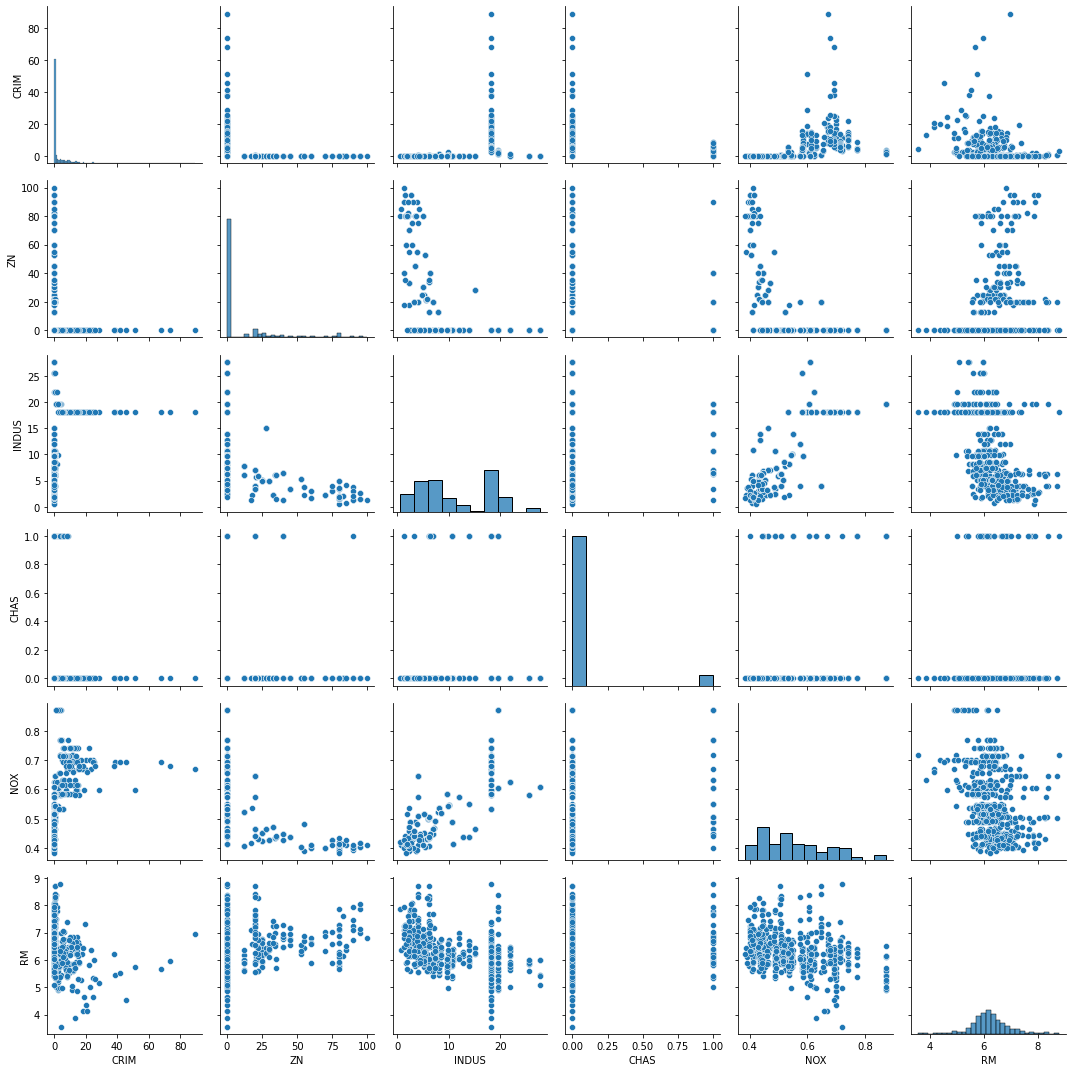

In [20]:
# Calculate and show pairplot
hp=house_price_dataframe.iloc[:,0:6]
sns.pairplot(hp, height=2.5)
plt.tight_layout()

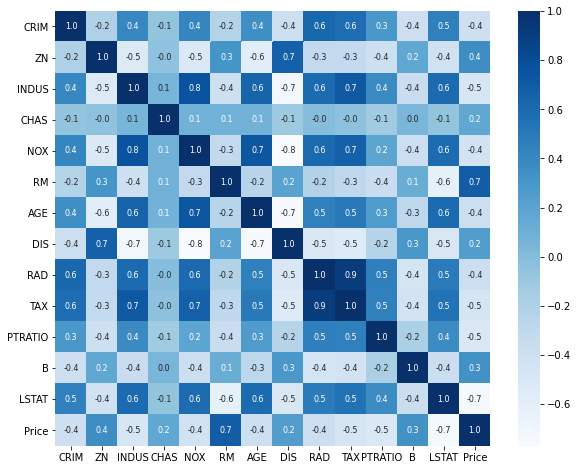

In [21]:
#Plotting the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [22]:
#Splittimg the dataset into target and data
X=house_price_dataframe.drop(['Price'],axis=1)
y=house_price_dataframe['Price']
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

In [23]:
#Splitting the data into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


## Linear Regression

In [24]:
#Traing our model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#Value of Y-Intercept
lm.intercept_

37.19980774264986

In [26]:
#Converting Coefficients int a dataframe
coefficients=pd.DataFrame([X_train.columns,lm.coef_]).T
coefficients=coefficients.rename(columns={0:'Attribute',1:'coefficients'})
coefficients

,Attribute,coefficients
0,CRIM,-0.108224
1,ZN,0.0389039
2,INDUS,-0.0151518
3,CHAS,3.15898
4,NOX,-16.5854
5,RM,3.63288
6,AGE,0.00935052
7,DIS,-1.38618
8,RAD,0.324066
9,TAX,-0.0116245


## Model Evaluation

In [27]:
#Model prediction on train data
y_pred=lm.predict(X_train)
print(y_pred)

[25.01156658 23.20086342 19.63206629 30.79723661 13.29598163 12.35655178
 21.17619058 11.52105413 13.48284934 23.29619143 16.67181245 11.9640623
 32.53526883 25.38737924 29.80188665 19.51269487 24.14966495 24.10079632
 30.6933436  19.14366521 33.53309203  3.93459665 41.11203484 24.48533152
 20.09948308 23.54618062 21.50057915 25.02443747 22.39275602 33.67942244
 25.49286716  8.07877994 17.45164918 10.02711469 20.30483806 12.97802751
 18.36662544 25.4320083  14.00655745 17.89557148 24.77620977 28.90131112
 17.27439484 23.1865498  12.62489379 11.32274928 27.4978866  19.49269776
 44.80229099 16.9529603  22.44602306 33.66680303 20.2706101  20.70205114
 20.98558754 21.63228494 27.05322369 33.11940621 25.61757987 32.73314444
 20.91920151 41.11899411 15.32086807  8.42394611 22.84480968 13.72210624
 28.60744627 17.09291577 26.76454185 39.14699941 34.90240572 35.55989745
 21.98217997 28.96612576 25.11129326 42.52704888 19.53053513 22.63970213
 17.14416523 27.37214688 33.68385271 25.77228001 26.

In [28]:
#Evaluation of Model
acc_linreg=metrics.r2_score(Y_train,y_pred)
print('R^2:',acc_linreg)
print('MAE:',metrics.mean_absolute_error(Y_train,y_pred))
print('MSE:',metrics.mean_squared_error(Y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

R^2: 0.7285831776605591
MAE: 3.3844575399167987
MSE: 22.953693576112883
RMSE: 4.791001312472465


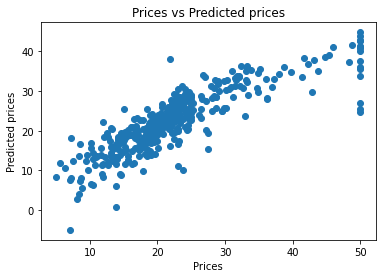

In [29]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

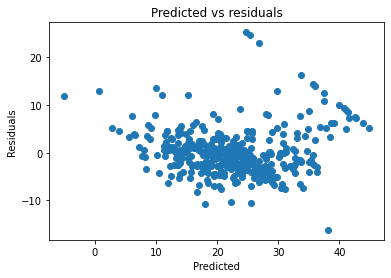

In [30]:
# Checking residuals
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

XGBoost Regression

In [31]:
#Importing library for XGBoost Regression
model=XGBRegressor()
model.fit(X_train,Y_train)

[20:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
# Model prediction on train data
y_pred=model.predict(X_train)
print(y_pred)

[23.360205  22.462858  20.84804   33.77895   15.333282  13.616525
 21.71274   15.175322  11.724756  21.836252  16.08508    7.52517
 31.094206  48.56228   32.623158  20.546066  22.177324  20.500404
 31.666502  20.551508  25.74269    8.247894  45.200817  22.069397
 20.698004  20.100042  19.873472  26.242834  23.39618   31.927258
 21.493471   9.280926  18.504272  21.87202   12.504413  10.578829
 13.054951  23.541336  19.164755  15.888303  23.768887  28.454714
 15.539753  18.049202  16.23671   14.08383   25.33273   17.575668
 49.566467  16.990675  21.738977  32.935143  16.125738  22.45393
 20.776966  20.042227  22.898897  38.124043  30.607079  32.607468
 20.919416  47.348038  14.524615   8.126455  19.581661   9.030508
 26.462107  17.69918   20.546162  46.312218  39.689137  34.387108
 22.11083   34.568977  24.873934  50.078335  14.5669775 20.525211
 20.62971   23.202105  49.514477  23.12061   24.795782  20.319666
 43.869396  17.110266  32.165016  34.75202    7.313497  20.309446
 18.038298  

In [33]:
# Model Evaluation
acc_XGB=metrics.r2_score(Y_train,y_pred)
print('R^2:',acc_XGB)
print('MAE:',metrics.mean_absolute_error(Y_train,y_pred))
print('MSE:',metrics.mean_squared_error(Y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

R^2: 0.9733349094832763
MAE: 1.145314053261634
MSE: 2.25506404365286
RMSE: 1.5016870658205923


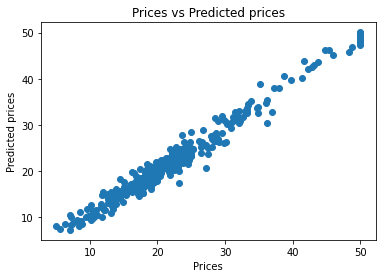

In [34]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

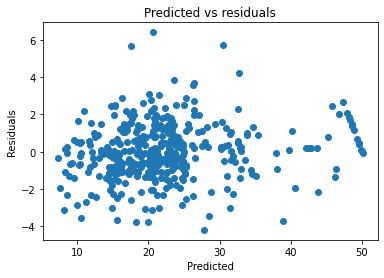

In [35]:
# Checking residuals
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


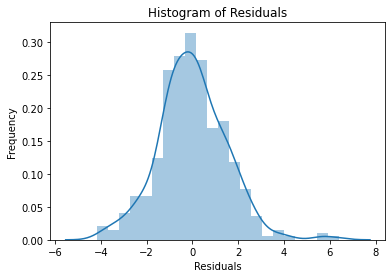

In [36]:
sns.distplot(Y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

In [37]:
#Predicting Test data with the model
y_test_pred = model.predict(X_test)

In [38]:
# Model Evaluation
acc_xgb = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.9115937697657654
Adjusted R^2: 0.8985337584811626
MAE: 1.9922956859364223
MSE: 7.3960370952309304
RMSE: 2.719565607818817


### Evaluation and Comparision of Models

In [39]:
models = pd.DataFrame({
    'Model': ['LinearRegression','XGBoost'],
    'R-squared Score': [acc_linreg*100,acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,XGBoost,91.159377
0,LinearRegression,72.858318




> ### Hence XGBoost regression works best for this dataset



